###  <font color='green' size=5> HW #1: Twitter Sentiment Analysis
</font> 

**Customer Analytics** <br>
**ANLT 274** <br>
**November 10, 2018** <br>
<br>

<font color='green' size=4> By: Ali Taheri</font>

This notebook demonstrates sentiments analysis of indian people about demonitization in India. We use a dataset that consists these tweets. First, we read it in a pandas dataframe and see some of them for understanding of structure.

In [32]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
#from subprocess import check_output

tweets=pd.read_csv("demonetization-tweets.csv",encoding = "ISO-8859-1")
tweets.head()

,Unnamed: 0,X,text,favorited,favoriteCount,replyToSN,created,truncated,replyToSID,id,replyToUID,statusSource,screenName,retweetCount,isRetweet,retweeted
0,1,1,RT @rssurjewala: Critical question: Was PayTM ...,False,0,NaN,2016-11-23 18:40:30,False,NaN,8.014957e+17,NaN,"<a href=""http://twitter.com/download/android"" ...",HASHTAGFARZIWAL,331,True,False
1,2,2,RT @Hemant_80: Did you vote on #Demonetization...,False,0,NaN,2016-11-23 18:40:29,False,NaN,8.014957e+17,NaN,"<a href=""http://twitter.com/download/android"" ...",PRAMODKAUSHIK9,66,True,False
2,3,3,"RT @roshankar: Former FinSec, RBI Dy Governor,...",False,0,NaN,2016-11-23 18:40:03,False,NaN,8.014955e+17,NaN,"<a href=""http://twitter.com/download/android"" ...",rahulja13034944,12,True,False
3,4,4,RT @ANI_news: Gurugram (Haryana): Post office ...,False,0,NaN,2016-11-23 18:39:59,False,NaN,8.014955e+17,NaN,"<a href=""http://twitter.com/download/android"" ...",deeptiyvd,338,True,False
4,5,5,RT @satishacharya: Reddy Wedding! @mail_today ...,False,0,NaN,2016-11-23 18:39:39,False,NaN,8.014954e+17,NaN,"<a href=""http://cpimharyana.com"" rel=""nofollow...",CPIMBadli,120,True,False


In [34]:
tweets.shape

(14940, 17)

We have about 15K tweets, so our results could be reasonable. <br>
For analysis, we use vader and util modules of nltk package. we add five columns for compound_polarity, neutrality, naegativity, positivity and type of tweet as below. Type of tweet would be identified based on value of compound polartiy.

In [37]:
from nltk.sentiment.vader import SentimentIntensityAnalyzer
from nltk.sentiment.util import *

from nltk import tokenize

sid = SentimentIntensityAnalyzer()

tweets['sentiment_compound_polarity']=tweets['text'].apply(lambda x:sid.polarity_scores(x)['compound'])
tweets['sentiment_neutral']=tweets['text'].apply(lambda x:sid.polarity_scores(x)['neu'])
tweets['sentiment_negative']=tweets['text'].apply(lambda x:sid.polarity_scores(x)['neg'])
tweets['sentiment_pos']=tweets['text'].apply(lambda x:sid.polarity_scores(x)['pos'])
tweets['sentiment_type']=''
tweets.loc[tweets['sentiment_compound_polarity'] > 0,'sentiment_type']='POSITIVE'
tweets.loc[tweets['sentiment_compound_polarity'] ==0,'sentiment_type']='NEUTRAL'
tweets.loc[tweets['sentiment_compound_polarity'] <0,'sentiment_type']='NEGATIVE'
tweets.head(20)

,Unnamed: 0,X,text,favorited,favoriteCount,replyToSN,created,truncated,replyToSID,id,...,screenName,retweetCount,isRetweet,retweeted,hour,sentiment_compound_polarity,sentiment_neutral,sentiment_negative,sentiment_pos,sentiment_type
0,1,1,RT @rssurjewala: Critical question: Was PayTM ...,False,0,NaN,2016-11-23 18:40:30,False,NaN,8.014957e+17,...,HASHTAGFARZIWAL,331,True,False,18,0.1027,0.783,0.100,0.117,POSITIVE
1,2,2,RT @Hemant_80: Did you vote on #Demonetization...,False,0,NaN,2016-11-23 18:40:29,False,NaN,8.014957e+17,...,PRAMODKAUSHIK9,66,True,False,18,0.0000,1.000,0.000,0.000,NEUTRAL
2,3,3,"RT @roshankar: Former FinSec, RBI Dy Governor,...",False,0,NaN,2016-11-23 18:40:03,False,NaN,8.014955e+17,...,rahulja13034944,12,True,False,18,0.0000,1.000,0.000,0.000,NEUTRAL
3,4,4,RT @ANI_news: Gurugram (Haryana): Post office ...,False,0,NaN,2016-11-23 18:39:59,False,NaN,8.014955e+17,...,deeptiyvd,338,True,False,18,0.0000,1.000,0.000,0.000,NEUTRAL
4,5,5,RT @satishacharya: Reddy Wedding! @mail_today ...,False,0,NaN,2016-11-23 18:39:39,False,NaN,8.014954e+17,...,CPIMBadli,120,True,False,18,0.0000,1.000,0.000,0.000,NEUTRAL
5,6,6,@DerekScissors1: Indias #demonetization: #Bla...,False,0,DerekScissors1,2016-11-23 18:39:11,False,NaN,8.014953e+17,...,ambazaarmag,0,False,False,18,0.0000,1.000,0.000,0.000,NEUTRAL
6,7,7,RT @gauravcsawant: Rs 40 lakh looted from a ba...,False,0,NaN,2016-11-23 18:38:53,False,NaN,8.014952e+17,...,bhodia1,637,True,False,18,-0.6249,0.830,0.170,0.000,NEGATIVE
7,8,8,RT @Joydeep_911: Calling all Nationalists to j...,False,0,NaN,2016-11-23 18:38:20,False,NaN,8.014951e+17,...,KARUNASHANKEROJ,112,True,False,18,0.3818,0.874,0.000,0.126,POSITIVE
8,9,9,RT @sumitbhati2002: Many opposition leaders ar...,False,0,NaN,2016-11-23 18:38:09,False,NaN,8.014951e+17,...,sumitbhati2002,1,True,False,18,0.7003,0.721,0.000,0.279,POSITIVE
9,10,10,National reform now destroyed even the essence...,False,0,NaN,2016-11-23 18:38:00,True,NaN,8.014950e+17,...,HelpIndia2016,0,False,False,18,-0.2023,0.728,0.155,0.117,NEGATIVE


Now, we make a bar plot for showing distribution of tweets on polarity. 

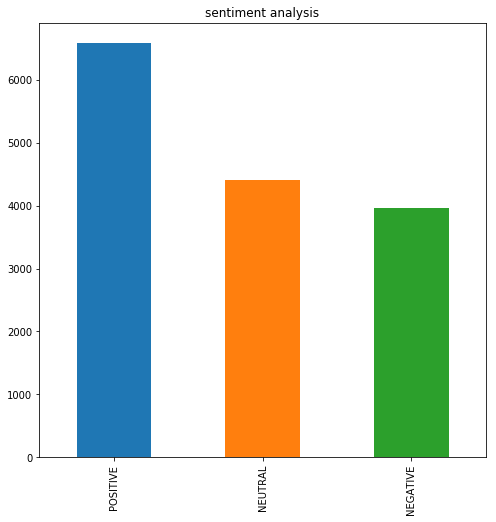

In [38]:
(tweets['sentiment_type'].value_counts()).plot(kind='bar',title="sentiment analysis")

Above plot shows more than 6K tweets are positive, more than 4K are neutral and fewer than 4K are negative. <br>
Now, we draw average ploarity of tweets based on time of tweets.

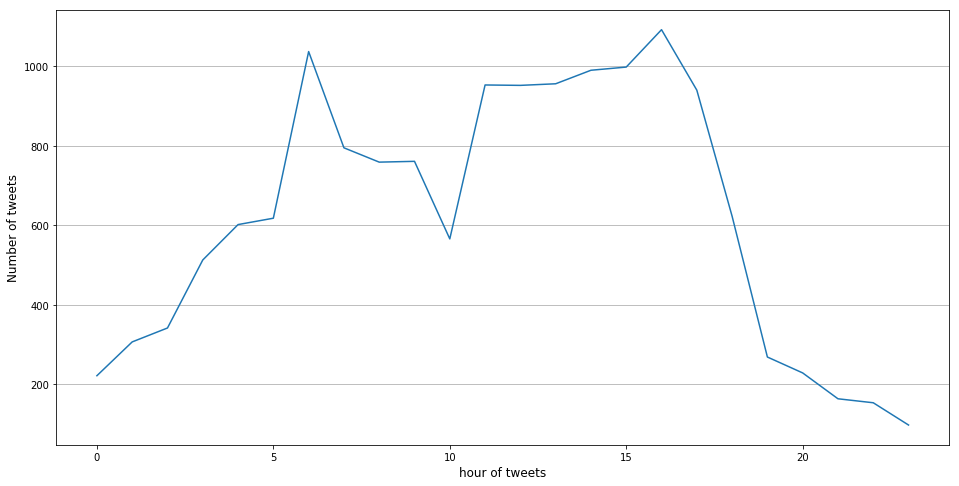

In [39]:

plt.figure(figsize=(16,8))

tweets['hour'] = pd.DatetimeIndex(tweets['created']).hour
df=(tweets.groupby('hour',as_index=False).sentiment_compound_polarity.count())
plt.plot(df.hour,df.sentiment_compound_polarity)
plt.xlabel("hour of tweets", fontsize = 12)
plt.ylabel("Number of tweets", fontsize = 12)
plt.grid(axis='y')

It shows that main time of tweets was between 5AM and 18PM. 

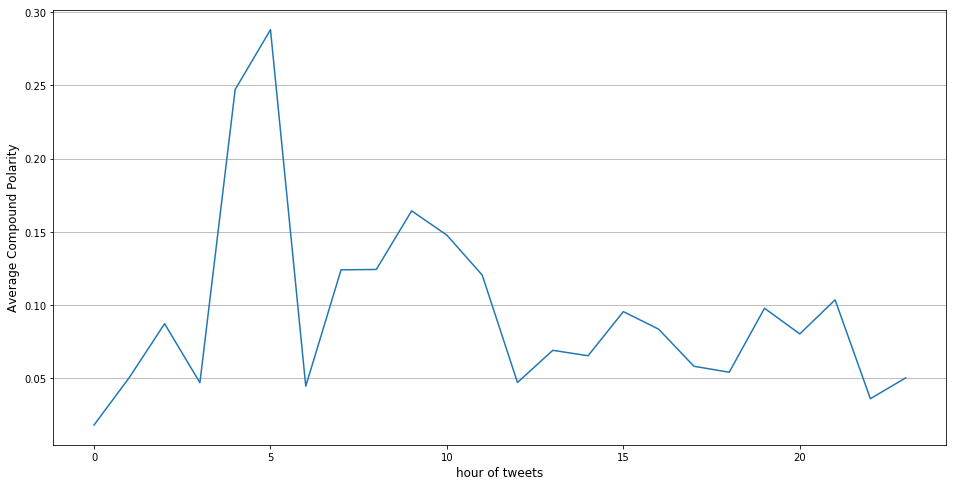

In [42]:
plt.figure(figsize=(16,8))

tweets['hour'] = pd.DatetimeIndex(tweets['created']).hour
df=(tweets.groupby('hour',as_index=False)['sentiment_compound_polarity'].mean())
plt.plot(df['hour'],df['sentiment_compound_polarity'])
plt.xlabel("hour of tweets", fontsize = 12)
plt.ylabel("Average Compound Polarity", fontsize = 12)
plt.grid(axis='y')

Above figure shows that tweets of morning are more positive than tweets of afternoon!